In [1]:
# PREDICTION PIPELINE
# ---------------------------
# 1. load the data
# 2. Feature Engineering Steps / Data Preprocessing or Cleansing Steps
#         removal/filling of null values
#         removal of duplicate values
#         removing outliers
#         standardization & scaling
#         encoding categorical variable
# 3. Split the data into train & test data
# 4. Select approriate model
# 5. fit the model on training data
#         so that model is able to capture the features
#         it is a training part
# 6. derive prediction on the test data
# 7. generate algorithm metrics
#         to determine how good a model is performing
# 8. tune model parameters
# 9. retrain the model(frorm step 6)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer, confusion_matrix, classification_report,silhouette_score
from time import time
import string
import re
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'C:\\Users\\Rachamalla\\Desktop\\Anaconda_Python\\miniProject'

In [4]:
#read the dataset

# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/My Drive/ACADEMICS/Verzeo ML/PROJECTS/MAJOR PROJECT/Corona_NLP (2).csv', encoding = 'latin1')

df = pd.read_csv('C:/Users/Rachamalla/Desktop/Anaconda_Python/miniProject/cyber_labelled.csv')

# ***Feature Engineering Steps / Data Preprocessing Steps***
####        removal/filling of null values
####        removal of duplicate values
####        removing outliers
####        standardization & scaling
####        encoding categorical variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35787 entries, 0 to 35786
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  35787 non-null  object
 1   label      35787 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 559.3+ KB


In [6]:
df.dtypes

full_text    object
label         int64
dtype: object

In [7]:
# no.of rows, no.of columns  of the dataframe
df.shape

(35787, 2)

In [8]:
# Checking of null values
# df.isna().any()
df.isnull().sum()

full_text    0
label        0
dtype: int64

In [9]:
# Description about the dataframe df
df.describe()

,label
count,35787.000000
mean,0.657529
std,0.474543
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
# No.of duplicate records
# df.nunique()
df.duplicated().sum()
# df= df.drop_duplicates()

0

In [11]:
df.head()

,full_text,label
0,So Drasko just said he was impressed the girls...,1
1,Drasko they didn't cook half a bird you idiot ...,1
2,Hopefully someone cooks Drasko in the next ep ...,1
3,of course you were born in serbia...you're as ...,1
4,These girls are the equivalent of the irritati...,1


In [12]:
df['classification']=df['label'].replace(1,'Bullying')
df['classification']=df['classification'].replace(0,'Non-Bullying')
df

,full_text,label,classification
0,So Drasko just said he was impressed the girls...,1,Bullying
1,Drasko they didn't cook half a bird you idiot ...,1,Bullying
2,Hopefully someone cooks Drasko in the next ep ...,1,Bullying
3,of course you were born in serbia...you're as ...,1,Bullying
4,These girls are the equivalent of the irritati...,1,Bullying
...,...,...,...
35782,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1,Bullying
35783,"you've gone and broke the wrong heart baby, an...",0,Non-Bullying
35784,young buck wanna eat!!.. dat nigguh like I ain...,1,Bullying
35785,youu got wild bitches tellin you lies,1,Bullying


In [13]:
df.head()

,full_text,label,classification
0,So Drasko just said he was impressed the girls...,1,Bullying
1,Drasko they didn't cook half a bird you idiot ...,1,Bullying
2,Hopefully someone cooks Drasko in the next ep ...,1,Bullying
3,of course you were born in serbia...you're as ...,1,Bullying
4,These girls are the equivalent of the irritati...,1,Bullying


In [14]:
df.tail()

,full_text,label,classification
35782,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1,Bullying
35783,"you've gone and broke the wrong heart baby, an...",0,Non-Bullying
35784,young buck wanna eat!!.. dat nigguh like I ain...,1,Bullying
35785,youu got wild bitches tellin you lies,1,Bullying
35786,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...,0,Non-Bullying


In [15]:
df.sample()

,full_text,label,classification
11344,"""@iLGDaily: And smoke weed in public, fuck cop...",1,Bullying


In [16]:
# checking for im-balance
df['classification'].value_counts()

Bullying        23531
Non-Bullying    12256
Name: classification, dtype: int64

# Apply LabelEncoder

In [17]:
# from sklearn.preprocessing import LabelEncoder
# for converting the classification column from string/object type to into either int or float type

#Note: not required

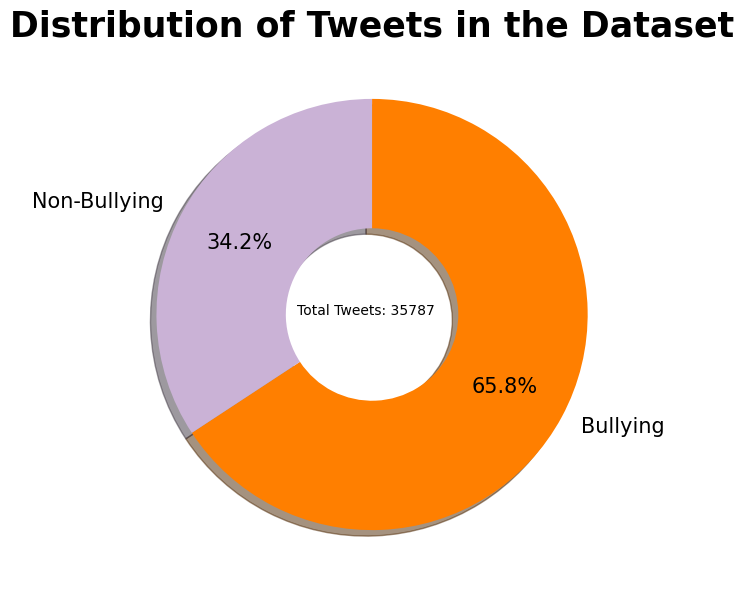

In [18]:
plt.figure(figsize = (7,7))
sorted_counts = df['classification'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(df.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontweight= 'bold', fontsize = 25);

# ***Text Cleansing or Preprocessing***


In [19]:
# !pip install nltk
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords') # it is one of the preprocessing step
stopwords = stopwords.words('english')
nltk.download('omw-1.4')
from nltk import word_tokenize, sent_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
# https://www.nltk.org/data.html
# https://www.nltk.org/nltk_data/

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [20]:
df.head(10)

,full_text,label,classification
0,So Drasko just said he was impressed the girls...,1,Bullying
1,Drasko they didn't cook half a bird you idiot ...,1,Bullying
2,Hopefully someone cooks Drasko in the next ep ...,1,Bullying
3,of course you were born in serbia...you're as ...,1,Bullying
4,These girls are the equivalent of the irritati...,1,Bullying
5,#MKR Lost the plot - where's the big Texan wi...,1,Bullying
6,"RT @PhxKen: SIR WINSTON CHURCHHILL: ""ISLAM IS ...",1,Bullying
7,RT @TheRightWingM: Giuliani watched his city a...,1,Bullying
8,RT @YesYoureRacist: At least you're only a tin...,1,Bullying
9,@MisfitInChains @oldgfatherclock @venereverita...,1,Bullying


In [21]:
corpus = [] # empty list
for text in df['full_text']:
    filtered_text = text.lower() # filtered_text is a sring type
    filtered_text = re.sub('[^a-zA-Z]', ' ', filtered_text)
    filtered_text = word_tokenize(filtered_text, preserve_line=True) # will handle the empty spaces also
    filtered_text = [word for word in filtered_text if word not in stopwords]
    filtered_text = [lm.lemmatize(word) for word in filtered_text] # it returns a list of words, 
    filtered_text = " ".join(filtered_text) # and to join these words to form a sentence 
    corpus.append(filtered_text)

In [22]:
print(corpus)

['drasko said impressed girl cooked half chicken cooked whole one mkr', 'drasko cook half bird idiot mkr', 'hopefully someone cook drasko next ep mkr', 'course born serbia fucked serbian film mkr', 'girl equivalent irritating asian girl couple year ago well done mkr', 'mkr lost plot big texan elephant sized steak brekkie', 'rt phxken sir winston churchhill islam dangerous man rabies dog http co kcxgkd sk', 'rt therightwingm giuliani watched city attacked amp people jump death entitled say wtf want guy shield', 'rt yesyoureracist least tiny bit racist rt anmo racist dick', 'misfitinchains oldgfatherclock venereveritas santa white', 'rt dreamdefenders eric holder ferguson understand mistrust attorney general also black man http', 'rt antoniofrench spent morning board election getting map data start registering every black person ferguson ht', 'rt harikondabolu ferguson testimony darren wilson said thought look like demon shot mike brown ironic word', 'server restaurant beard make look li

# Applying CountVectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [24]:
# To avoid the sparse matrix situation, we can provide the parameter max_features=some_value
# we get the output in  occurrences of those some_value top maximum frequency words
count_vector = CountVectorizer(max_features=5000) # counting the total no.of unique words from the corpus
sparse_matrix = count_vector.fit_transform(corpus).toarray()
print(sparse_matrix.shape)

# print(count_vector.get_feature_names()) # list of total unique words
# print(len(count_vector.get_feature_names()))

(35787, 5000)


In [25]:
# training_data = count_vector.fit_transform(X_train)
# testing_data = count_vector.transform(X_test)

In [26]:
x = sparse_matrix
y = df['label']
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


# ***Splitting the dataset into Train and Test data***

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [28]:
# x_train, x_test, y_train, y_test = train_test_split(df['full_text'], df['label'], random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) # , random_state=42, test_size=0.25

# print('Number of rows in the total set: {}'.format(df.shape[0]))
# print('Number of rows in the training set: {}'.format(X_train.shape[0]))
# print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print('Number of rows in the total set: ',df.shape[0])
print('Number of rows in the training set: ',x_train.shape[0])
print('Number of rows in the test set: ',x_test.shape[0])
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# MemoryError: Unable to allocate 8.61 GiB for an array with shape (26840, 43076) and data type int64

Number of rows in the total set:  35787
Number of rows in the training set:  26840
Number of rows in the test set:  8947
(26840, 5000)
(8947, 5000)
(26840,)
(8947,)


In [29]:
from sklearn.ensemble import RandomForestClassifier

# ***Supervised Learning Models***

In [30]:
LogisticRegression_Model = LogisticRegression(solver='liblinear')
SGDClassifier_Model = SGDClassifier()
AdaBoostClassifier_Model = AdaBoostClassifier()
KNeighborsClassifier_Model = KNeighborsClassifier(n_neighbors=50)
LinearSVC_Model = LinearSVC()
Linear_SVM_Model = SVC(kernel='linear', C=0.1)
# RBF_SVM_Model = SVC(kernel='rbf', C=0.1, gamma=0.1)
DecisionTreeClassifier_Model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=10)
RandomForestClassifier_Model = RandomForestClassifier(criterion='gini', max_depth=3, min_samples_split=10, n_estimators=10)
MultinomialNB_Model = MultinomialNB()

ML_Models_list = [LogisticRegression_Model, SGDClassifier_Model, AdaBoostClassifier_Model, KNeighborsClassifier_Model, 
                  LinearSVC_Model, DecisionTreeClassifier_Model, 
                  RandomForestClassifier_Model, MultinomialNB_Model]

In [31]:
def pipeline(ML_Models_list, x_train, y_train, x_test, y_test):
    size = len(y_train)
#     results = {}
    model_outlines = {}
#     final_model_result = []
    each_model_result = []
    
    for model in ML_Models_list:
        
        model_outlines['Algorithm'] = model.__class__.__name__
        
        print("Training {} model".format(model.__class__.__name__))
        start = time() 
        model = model.fit(x_train, y_train)
        end = time()
        model_outlines['Training Time'] = end - start
        
        start = time() 
        model_ytest_predictions = model.predict(x_test)
        model_train_predictions = model.predict(x_train)
        end = time()
        model_outlines['Prediction Time'] = end - start
        
        model_outlines['Training Score'] = model.score(x_train, y_train)*100
        model_outlines['Testing Score'] = model.score(x_test, y_test)*100
        
#         print("Training Score : ",model.score(x_train, y_train)*100)
#         print("Testing Score : ",model.score(x_test, y_test)*100)
        model_outlines['Accuracy: Test'] = accuracy_score(y_test, model_ytest_predictions)
        model_outlines['Accuracy: Train'] = accuracy_score(y_train, model_train_predictions)

        model_outlines['F1 Score: Test'] = f1_score(y_test, model_ytest_predictions) 
        #average='binary',labels=[pos_label]) # zero_division=1, pos_label='pos'
        model_outlines['F1 Score: Train'] = f1_score(y_train, model_train_predictions)

        model_outlines['Precision: Test'] = precision_score(y_test, model_ytest_predictions)
        model_outlines['Precision: Train'] = precision_score(y_train, model_train_predictions)

        model_outlines['Recall: Test'] = recall_score(y_test, model_ytest_predictions)
        model_outlines['Recall: Train'] = recall_score(y_train, model_train_predictions)
        
        model_outlines['Confusion Matrix: Test'] = confusion_matrix(y_test, model_ytest_predictions)        
        model_outlines['Confusion Matrix: Train'] = confusion_matrix(y_train, model_train_predictions)

        print("Training {} finished in {:.2f} sec".format(model.__class__.__name__, model_outlines['Training Time']))
        print('__________________________________________________________')
        
        each_model_result.append(model_outlines.copy())

    return each_model_result

In [33]:
final_all_models_result = pipeline(ML_Models_list, x_train, y_train, x_test, y_test)
# results = pd.DataFrame(re)
All_Models_Result_List = pd.DataFrame(final_all_models_result)
All_Models_Result_List = All_Models_Result_List.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time', 'Confusion Matrix: Test', 'Confusion Matrix: Train'])

Training LogisticRegression model
Training LogisticRegression finished in 1.08 sec
__________________________________________________________
Training SGDClassifier model
Training SGDClassifier finished in 4.29 sec
__________________________________________________________
Training AdaBoostClassifier model
Training AdaBoostClassifier finished in 166.18 sec
__________________________________________________________
Training KNeighborsClassifier model
Training KNeighborsClassifier finished in 0.00 sec
__________________________________________________________
Training LinearSVC model
Training LinearSVC finished in 1.39 sec
__________________________________________________________
Training DecisionTreeClassifier model
Training DecisionTreeClassifier finished in 8.20 sec
__________________________________________________________
Training RandomForestClassifier model
Training RandomForestClassifier finished in 0.80 sec
__________________________________________________________
Training Mul

In [34]:
All_Models_Result_List.sort_values(by = 'Accuracy: Test', ascending = False, inplace = True) # ascending = False
All_Models_Result_List.reset_index(drop = True)

,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time,Confusion Matrix: Test,Confusion Matrix: Train
0,SGDClassifier,0.926568,0.967368,0.919647,0.942904,0.554123,0.952459,0.981115,0.945837,0.963153,4.291834,"[[2865, 183], [474, 5425]]","[[8887, 321], [955, 16677]]"
1,LogisticRegression,0.924667,0.963291,0.920834,0.941584,0.635320,0.954844,0.980005,0.950658,0.965108,1.080109,"[[2841, 207], [467, 5432]]","[[8866, 342], [870, 16762]]"
2,AdaBoostClassifier,0.914720,0.967079,0.901339,0.933053,19.971916,0.912332,0.964492,0.899671,0.930955,166.184288,"[[2867, 181], [582, 5317]]","[[8624, 584], [1769, 15863]]"
3,LinearSVC,0.912708,0.943963,0.922360,0.933036,0.502306,0.970641,0.984803,0.970281,0.977488,1.388489,"[[2725, 323], [458, 5441]]","[[8944, 264], [524, 17108]]"
4,MultinomialNB,0.894937,0.915675,0.925920,0.920769,0.517983,0.911028,0.930524,0.934324,0.932420,1.927560,"[[2545, 503], [437, 5462]]","[[7978, 1230], [1158, 16474]]"
5,KNeighborsClassifier,0.832905,0.977657,0.764028,0.857741,114.427950,0.840499,0.979390,0.773480,0.864341,0.000972,"[[2945, 103], [1392, 4507]]","[[8921, 287], [3994, 13638]]"
6,DecisionTreeClassifier,0.796915,0.996111,0.694694,0.818536,0.363410,0.798659,0.995221,0.696858,0.819734,8.203132,"[[3032, 16], [1801, 4098]]","[[9149, 59], [5345, 12287]]"
7,RandomForestClassifier,0.659327,0.659327,1.000000,0.794692,0.390573,0.657116,0.657052,1.000000,0.793038,0.800987,"[[0, 3048], [0, 5899]]","[[5, 9203], [0, 17632]]"


In [35]:
All_Models_Result_List.describe().loc[['min', 'max'], :]

,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
min,0.659327,0.659327,0.694694,0.794692,0.36341,0.657116,0.657052,0.696858,0.793038,0.000972
max,0.926568,0.996111,1.000000,0.942904,114.42795,0.970641,0.995221,1.000000,0.977488,166.184288


In [36]:
best_Accuracy = All_Models_Result_List[All_Models_Result_List['Accuracy: Test'].max() == All_Models_Result_List['Accuracy: Test']]
best_f1Score = All_Models_Result_List[All_Models_Result_List['F1 Score: Test'].max() == All_Models_Result_List['F1 Score: Test']]
best_Precision = All_Models_Result_List[All_Models_Result_List['Precision: Test'].max() == All_Models_Result_List['Precision: Test']]
best_Recall = All_Models_Result_List[All_Models_Result_List['Recall: Test'].max() == All_Models_Result_List['Recall: Test']]

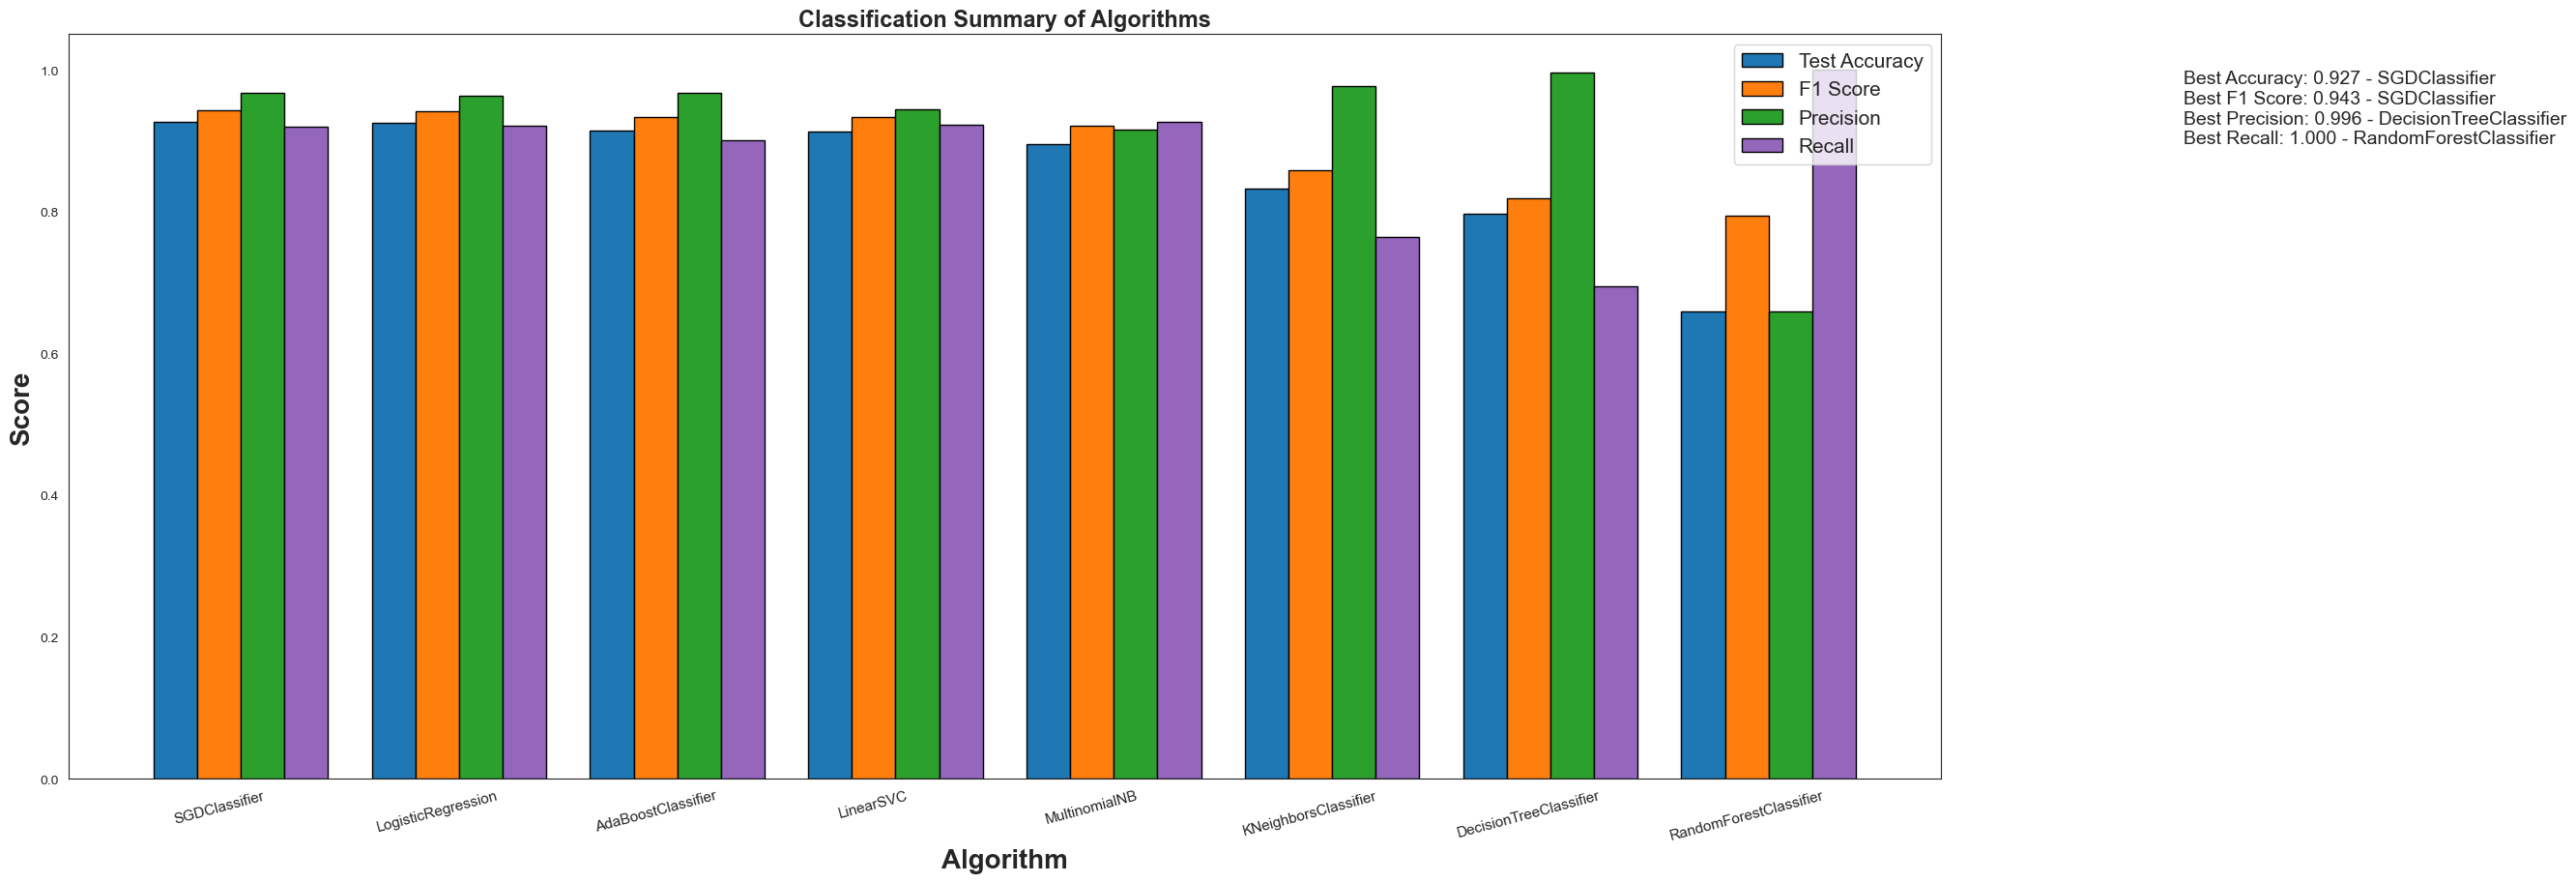

In [37]:
sns.set_style('white')
plt.figure(figsize = (25, 10))
barWidth = 0.20

bars1 = All_Models_Result_List['Accuracy: Test']
bars2 = All_Models_Result_List['F1 Score: Test']
bars3 = All_Models_Result_List['Precision: Test']
bars4 = All_Models_Result_List['Recall: Test']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

palette = sns.color_palette()
plt.bar(r1, bars1, color= palette[0], width=barWidth, edgecolor='black', label='Test Accuracy')
plt.bar(r2, bars2, color= palette[1], width=barWidth, edgecolor='black', label='F1 Score')
plt.bar(r3, bars3, color= palette[2], width=barWidth, edgecolor='black', label='Precision')
plt.bar(r4, bars4, color= palette[4], width=barWidth, edgecolor='black', label='Recall')

plt.xlabel('Algorithm', fontweight='bold', fontsize = 20)
plt.ylabel('Score', fontweight = 'bold', fontsize = 20)
plt.xticks([r + barWidth for r in range(len(bars1))], All_Models_Result_List['Algorithm'], rotation = 15, fontsize = 11)

plt.legend(fontsize = 15)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_Accuracy['Accuracy: Test'].values[0], best_Accuracy['Algorithm'].values[0]), 
                     'Best F1 Score: {:.3f} - {}'.format(best_f1Score['F1 Score: Test'].values[0], best_f1Score['Algorithm'].values[0]),
                   'Best Precision: {:.3f} - {}'.format(best_Precision['Precision: Test'].values[0], best_Precision['Algorithm'].values[0]), 
                    'Best Recall: {:.3f} - {}'.format(best_Recall['Recall: Test'].values[0], best_Recall['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='white', alpha=0.5) # lightgrey

plt.text(9.2, 1, textstr, fontsize=14, verticalalignment='top', bbox=props)

plt.title('Classification Summary of Algorithms', fontweight = 'bold', fontsize = 17);

In [38]:
best_train_time = All_Models_Result_List[All_Models_Result_List['Training Time'].min() == All_Models_Result_List['Training Time']]
worst_train_time = All_Models_Result_List[All_Models_Result_List['Training Time'].max() == All_Models_Result_List['Training Time']]
best_prediction_time = All_Models_Result_List[All_Models_Result_List['Prediction Time'].min() == All_Models_Result_List['Prediction Time']]
worst_prediction_time = All_Models_Result_List[All_Models_Result_List['Prediction Time'].max() == All_Models_Result_List['Prediction Time']]
# print(best_train_time[0], worst_train_time, best_prediction_time, worst_prediction_time)

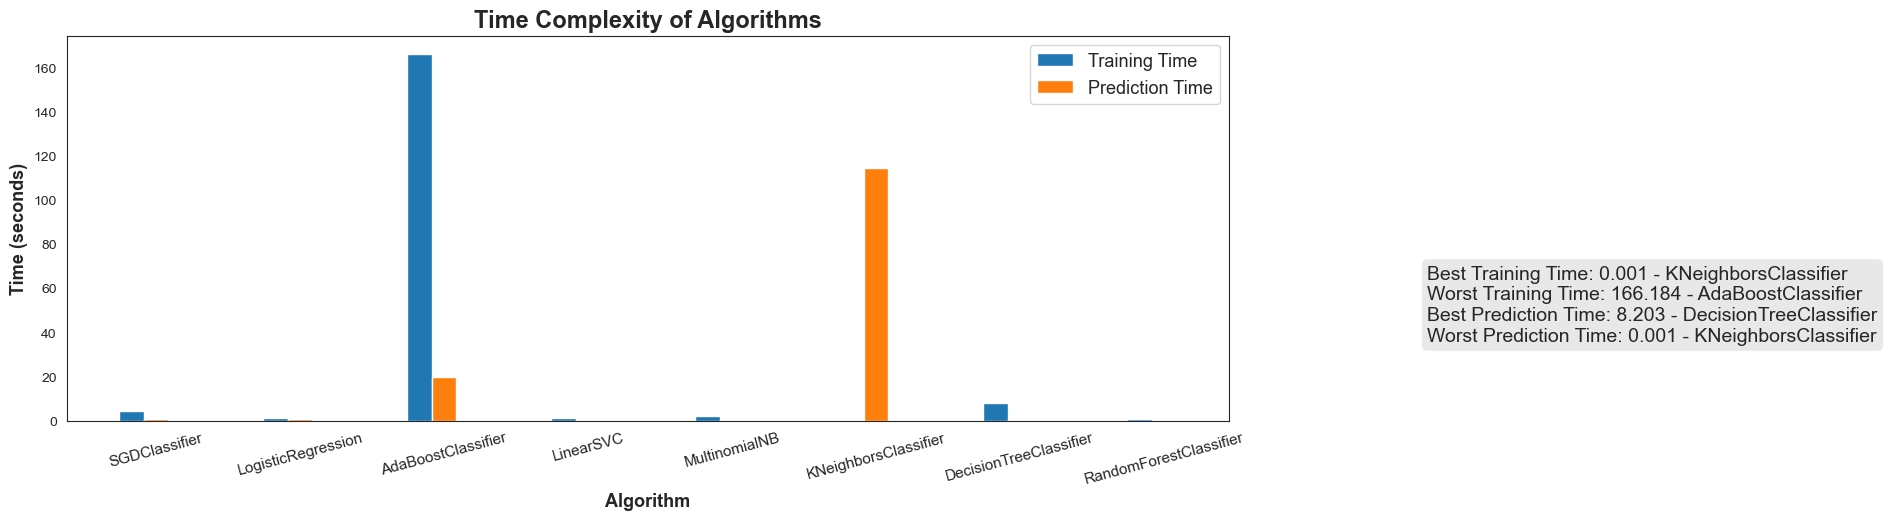

In [39]:
plt.figure(figsize = (15, 5))

barWidth = 0.17

bars1 = All_Models_Result_List['Training Time']
bars2 = All_Models_Result_List['Prediction Time']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color= palette[0], width=barWidth, edgecolor='white', label='Training Time')
plt.bar(r2, bars2, color= palette[1], width=barWidth, edgecolor='white', label='Prediction Time')

plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Time (seconds)', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], All_Models_Result_List['Algorithm'], rotation = 15, fontsize = 11)

plt.legend(fontsize = 13)

textstr = '\n'.join(('Best Training Time: {:.3f} - {}'.format(best_train_time['Training Time'].values[0], best_train_time['Algorithm'].values[0]), 
                     'Worst Training Time: {:.3f} - {}'.format(worst_train_time['Training Time'].values[0], worst_train_time['Algorithm'].values[0]),
                   'Best Prediction Time: {:.3f} - {}'.format(best_prediction_time['Training Time'].values[0], best_prediction_time['Algorithm'].values[0]), 
                    'Worst Prediction Time: {:.3f} - {}'.format(worst_prediction_time['Training Time'].values[0], worst_prediction_time['Algorithm'].values[0])))

props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

plt.text(9, 36, textstr, fontsize=14,  bbox=props)

plt.title('Time Complexity of Algorithms', fontweight = 'bold', fontsize = 17);

In [40]:
# !pip install gradio

In [41]:
import gradio as gr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [42]:
# choose the method with best results as classifier
vectorizer = TfidfVectorizer()
classifier = SGDClassifier()
# LogisticRegression(),  CountVectorizer
# x_train = vectorizer.fit(x_train)
# vectorizer.fit_transform(x_train).toarray()
# classifier.fit(vectorizer.transform(x_train), y_train)
vectorizer.fit(x_train)
x_train = vectorizer.fit_transform(x_train)
classifier.fit(vectorizer.transform(x_train), y_train)
# x_test = count_vector.transform(x_test)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
def predict_comment(comment):
    prediction = classifier.predict(vectorizer.transform([comment]))[0]
    if prediction == 0:
        return "Non-Bullying"
    else:
        return "Bullying"

In [ ]:
iface = gr.Interface(
    fn=predict_comment,
    inputs=gr.inputs.Textbox(label="Enter message"),
    outputs="label",
    title="Cyber Bullying Classification",
    description="Enter a message to see whether it is bullying or non_bullying.",
    theme="compact"
)

In [ ]:
iface.launch()